<a href="https://colab.research.google.com/github/Titus38/topojson-specification/blob/master/My_House_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
import numpy.random as rnd
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()


Saving My_Processing_data - Copy.csv to My_Processing_data - Copy.csv


In [5]:
import io
data = pd.read_csv(io.BytesIO(uploaded['My_Processing_data - Copy.csv']))
# Dataset is now stored in a Pandas Dataframe

In [6]:
data.head()

,FID,LATITUDE,LONGITUDE,Floor_Area,Price
0,0,-0.267520,36.105510,10,2000
1,1,-0.267070,36.105945,22,6000
2,2,-0.266693,36.106722,23,6500
3,3,-0.266022,36.107737,20,4500
4,4,-0.267494,36.106555,15,3500


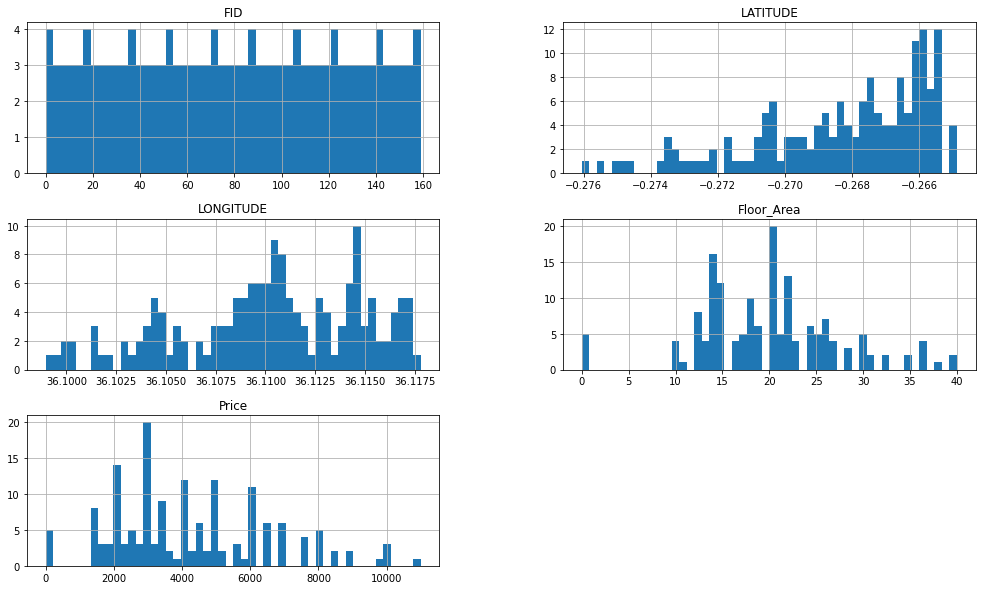

In [7]:
#Plotting histograms for various features
data.hist(bins=50, figsize=(17,10))
plt.show()

In [8]:
x=data.drop(['Price'],axis =1)
y=data['Price']

Splitting to train and Test data

In [9]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train ,y_test =train_test_split(x,y,test_size =0.2,random_state=4)

Linear Regression:Import Library

In [17]:
#import library for linear regression
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#Create a linear regressor
lm= LinearRegression()
#Train the model using the training sets
lm.fit(x_train,y_train)

LinearRegression()

In [23]:
#Model prediction on train data
y_pred =lm.predict(x_train)


In [24]:
#model evaluation
print('R^2:',metrics.r2_score(y_train,y_pred))
print('Adjusted R^2:',1-(1-metrics.r2_score(y_train,y_pred))/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train,y_pred))
print('MSE:',metrics.mean_squared_error(y_train,y_pred))
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred)))

R^2: 0.9058305617286206
Adjusted R^2: 0.9992343948108018
MAE: 560.7316510607598
MSE: 506718.4248368059
RMSE: 711.841572849469


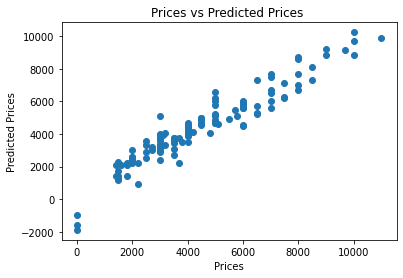

In [25]:
#Visualizing differences between actual prices and predicted values 
plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices ")
plt.show()


Inspecting Residuals

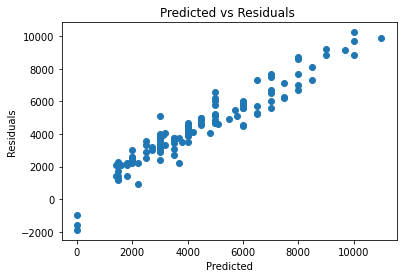

In [ ]:
#Checking Residuals
plt.scatter(y_train,y_pred)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Predicted vs Residuals ")
plt.show()


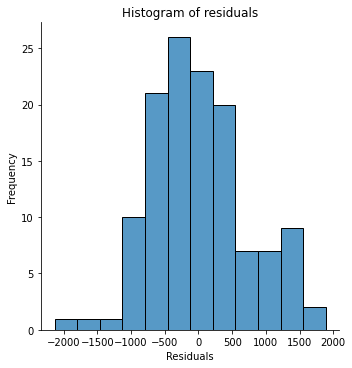

In [ ]:
#Checking normality of errors
import seaborn as sns 
sns.displot(y_train-y_pred)
plt.title ("Histogram of residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


Linear Regression :Model Evaluation of OLS

In [ ]:
# Predicting Test data with the model
y_test_pred =lm.predict(x_test)


In [ ]:
#model evaluation
acc_linreg =metrics.r2_score(y_test,y_test_pred)
print('R^2:',acc_linreg)
print('Adjusted R^2:',1-(1-metrics.r2_score(y_test,y_test_pred))/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test,y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_test_pred))
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

R^2: 0.8472682953525723
Adjusted R^2: 0.9943432701982434
MAE: 589.3553006963193
MSE: 557600.4842512393
RMSE: 746.726512353244


Random Forest :Import Random Forest Regressor

In [ ]:
#Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
#Create a Random Forest Regressor
Random =RandomForestRegressor()
#Train The model using the training sets
reg.fit(x_train,y_train)

[11:12:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Random Forest :Model Evaluation

In [ ]:
#Model prediction on train Data 
y_pred =reg.predict(x_train)

In [ ]:
#Model Evaluation
print('R^2:',metrics.r2_score(y_train,y_pred))
print('Adjusted R^2:',1-(1-metrics.r2_score(y_train,y_pred))/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train,y_pred))
print('MSE:',metrics.mean_squared_error(y_train,y_pred))
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred)))

R^2: 0.9882599455110722
Adjusted R^2: 0.9999045524025291
MAE: 187.7265625
MSE: 63172.3203125
RMSE: 251.3410438279033


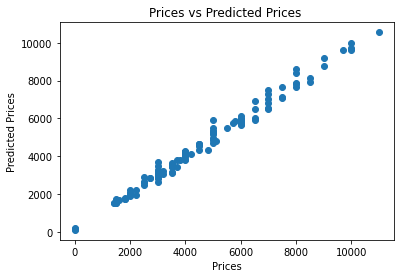

In [ ]:
#Visualizing differences between actual prices and predicted values 
plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices ")
plt.show()

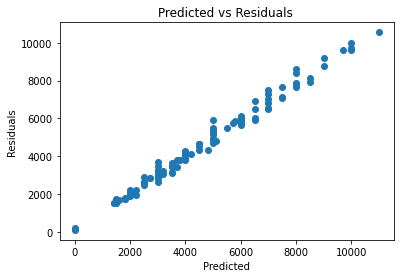

In [ ]:
#Checking Residuals
plt.scatter(y_train,y_pred)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Predicted vs Residuals ")
plt.show()

In [ ]:
#Predicting Test Data with the model
y_test_pred =reg.predict(x_test)

Random Forest Model Evaluation

In [ ]:
#Model Evaluation
acc_rf =metrics.r2_score(y_test,y_test_pred)
print('R^2:',acc_rf)
print('Adjusted R^2:',1-(1-metrics.r2_score(y_test,y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test,y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_test_pred))
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

R^2: 0.864893050449743
Adjusted R^2: 0.8448772060719272
MAE: 560.672176361084
MSE: 493255.153989404
RMSE: 702.3212612397577


XGBoost

XGBoost :Import XGBoost Regressor

In [ ]:
# Import XGBoost Regressor
from xgboost import XGBRegressor
#Create Xgboost Regressor
XGB = XGBRegressor()
#Train the model using training sets
XGB.fit(x_train,y_train)

[12:32:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

 XGBoost:Model Evaluation

In [ ]:
#Model Prediction on train data
y_pred =XGB.predict(x_train)


XGBoost Model Evaluation

In [ ]:
#model evaluation
print('R^2:',metrics.r2_score(y_train,y_pred))
print('Adjusted R^2:',1-(1-metrics.r2_score(y_train,y_pred))/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train,y_pred))
print('MSE:',metrics.mean_squared_error(y_train,y_pred))
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred)))

R^2: 0.9905046585752445
Adjusted R^2: 0.9999228021022377
MAE: 173.2845484316349
MSE: 51093.69386035821
RMSE: 226.03914231910855


XGBoost :Visualizing the differences between the actual  prices and predicted values 

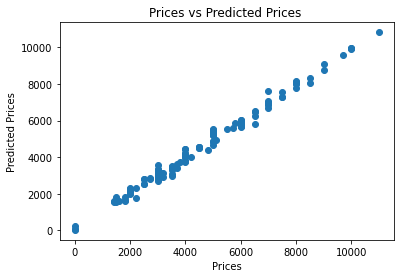

In [ ]:
#Visualizing differences between actual prices and predicted values 
plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices ")
plt.show()

XGBoost :Predicting Test Data With the model

In [ ]:
#Predicting Test Data with the model
y_test_pred =XGB.predict(x_test)


In [ ]:
#Model Evaluation
acc_xgb =metrics.r2_score(y_test,y_test_pred)
print('R^2:',acc_xgb)
print('Adjusted R^2:',1-(1-metrics.r2_score(y_test,y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test,y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_test_pred))
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

R^2: 0.864893050449743
Adjusted R^2: 0.8448772060719272
MAE: 560.672176361084
MSE: 493255.153989404
RMSE: 702.3212612397577


In [ ]:
data


,FID,LATITUDE,LONGITUDE,Floor_Area,Price,XGBoost Prediction,Linear Regression
0,0,-0.267520,36.105510,10,2000,XGBRegressor(),2000.0
1,1,-0.267070,36.105945,22,6000,XGBRegressor(),6000.0
2,2,-0.266693,36.106722,23,6500,XGBRegressor(),NaN
3,3,-0.266022,36.107737,20,4500,XGBRegressor(),4500.0
4,4,-0.267494,36.106555,15,3500,XGBRegressor(),3500.0
...,...,...,...,...,...,...,...
155,155,-0.271241,36.101248,22,4500,XGBRegressor(),4500.0
156,156,-0.274803,36.101482,30,8000,XGBRegressor(),8000.0
157,157,-0.275496,36.103020,31,7500,XGBRegressor(),7500.0
158,158,-0.276055,36.099563,28,7000,XGBRegressor(),7000.0


In [ ]:
models = pd.DataFrame({
    'Model':['LinearRegression','Random Forest','XGBoost'],'R-Squared Score':[acc_linreg*100,acc_rf*100,acc_xgb*100]
})
models.sort_values(by='R-Squared Score',ascending =False)

,Model,R-Squared Score
1,Random Forest,91.385720
2,XGBoost,86.489305
0,LinearRegression,84.726830
